In [1]:
from keras.applications import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import Model
from sklearn.metrics.pairwise import euclidean_distances

%matplotlib inline

Using TensorFlow backend.


Setup VGG16 Model

In [2]:
# load VGG16
#Get back the convolutional part of a VGG network trained on ImageNet
model = VGG16(weights='imagenet', include_top=True)

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Function which gets an image converts it to grayscale (the color is depth), crops it to 950x950 (to cut the product label), resizes to 224x224 and preprocess the image.

In [31]:
def image_pre_process(img_file):
    tmp = imread(img_file)
    img = np.zeros((tmp.shape[0],tmp.shape[1],3))
    img[:,:,0] = tmp
    img[:,:,1] = tmp
    img[:,:,2] = tmp
    # makes an RGB grayscale image
#     img = np.zeros((1024,1024,3))
#     img[:,:,0] = imread(img_file, as_grey=True)
#     img[:,:,1] = imread(img_file, as_grey=True)
#     img[:,:,2] = imread(img_file, as_grey=True)
    # crops the image so we remove the text label within it
    img = img[:950,37:987,:]
    img = resize(img, (224, 224), preserve_range=True).astype(np.float32)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [32]:
model2 = Model(input=model.input, output=model.get_layer('fc2').output) # gets the output in fc2

/Users/robertomac/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fc...)`
  if __name__ == '__main__':


Function that extracts the list of images, preprocesses the image, extracts the 4096 features and saves in a list.

In [33]:
def process(retina_list,loc,disease):
    out1=[]
    for i in range(len(retina_list)):
        print(i)
        name = loc + retina_list[i]
        if name[-4:]=='jpeg':
            im = image_pre_process(name)
            out = model2.predict(im)
            out = list(out[0])
            out.append(retina_list[i])
            out.append(disease)
            out1.append(out)
    return(out1)

Gets the list of images from the 4 folders.

In [54]:
# output=[]
# retina_list = !ls OCT2017/train/CNV
# output.append(process(retina_list,'OCT2017/train/CNV/','CNV'))

# retina_list = !ls OCT2017/train/DME
# output.append(process(retina_list,'OCT2017/train/DME/','DME'))

# retina_list = !ls OCT2017/train/DRUSEN
# output.append(process(retina_list,'OCT2017/train/DRUSEN/','DRUSEN'))

# retina_list = !ls OCT2017/train/NORMAL
# output.append(process(retina_list,'OCT2017/train/NORMAL/','NORMAL'))


In [55]:
output=[]
retina_list = !ls OCT2017/test/CNV
output.append(process(retina_list,'OCT2017/test/CNV/','CNV'))

retina_list = !ls OCT2017/test/DME
output.append(process(retina_list,'OCT2017/test/DME/','DME'))

retina_list = !ls OCT2017/test/DRUSEN
output.append(process(retina_list,'OCT2017/test/DRUSEN/','DRUSEN'))

retina_list = !ls OCT2017/test/NORMAL
output.append(process(retina_list,'OCT2017/test/NORMAL/','NORMAL'))

0


/Users/robertomac/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
5

In [56]:
len(output[0])

242

Flattens the list from the 6 folders, and saves into a csv file.

In [57]:
newlist = [item for items in output for item in items]

In [58]:
len(newlist)

968

In [59]:
res = pd.DataFrame(newlist)

In [60]:
res.head()

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,4096,4097
0,0.000000,0.0,0.0,2.906517,0.000000,0.420020,4.296966,0.0,0.0,0.000000,...,0.473824,0.888168,0.217223,2.689590,0.0,1.375198,0.0,0.0,CNV-1016042-1.jpeg,CNV
1,0.000000,0.0,0.0,3.241205,0.000000,2.919435,4.524708,0.0,0.0,2.697443,...,0.000000,1.149813,0.000000,2.573175,0.0,2.244271,0.0,0.0,CNV-1016042-2.jpeg,CNV
2,0.000000,0.0,0.0,6.405076,0.366281,0.000000,7.313044,0.0,0.0,3.600244,...,2.894467,2.040965,1.211218,0.555682,0.0,1.679613,0.0,0.0,CNV-1016042-3.jpeg,CNV
3,0.000000,0.0,0.0,3.187257,0.000000,1.536624,4.851705,0.0,0.0,1.822675,...,0.000000,0.068944,0.000000,4.552268,0.0,2.679543,0.0,0.0,CNV-1016042-4.jpeg,CNV
4,0.467271,0.0,0.0,3.739561,0.000000,0.291195,4.140689,0.0,0.0,1.292297,...,0.000000,0.021926,0.173606,2.972565,0.0,5.274068,0.0,0.0,CNV-103044-1.jpeg,CNV


In [61]:
# res.to_csv('Features_Train.csv')
res.to_csv('Features_Test.csv')

In [62]:
temp = pd.read_csv('Features_Test.csv')

In [63]:
temp.tail()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4088,4089,4090,4091,4092,4093,4094,4095,4096,4097
963,963,0.0,0.000000,0.000000,4.383424,0.0,1.041579,0.799757,0.0,0.0,...,0.00000,2.006903,0.052957,0.663647,0.0,0.650955,0.0,0.0,NORMAL-772481-1.jpeg,NORMAL
964,964,0.0,0.000000,0.000000,5.013155,0.0,0.000000,0.758213,0.0,0.0,...,0.00000,1.054129,0.000000,0.986523,0.0,0.936115,0.0,0.0,NORMAL-84466-1.jpeg,NORMAL
965,965,0.0,0.465498,0.377908,5.448514,0.0,0.000000,3.241231,0.0,0.0,...,0.00000,2.163541,0.000000,0.494165,0.0,0.901897,0.0,0.0,NORMAL-85367-1.jpeg,NORMAL
966,966,0.0,0.000000,0.000000,2.413008,0.0,1.697062,0.000000,0.0,0.0,...,0.00000,1.796705,0.000000,0.000000,0.0,0.123278,0.0,0.0,NORMAL-9251-1.jpeg,NORMAL
967,967,0.0,1.561401,0.000000,4.855463,0.0,0.000000,5.432052,0.0,0.0,...,0.18161,0.000000,0.000000,2.874699,0.0,1.294998,0.0,0.0,NORMAL-98720-1.jpeg,NORMAL


Visualizes the features and data.

In [64]:
res2= res

In [65]:
res2.drop([4096,4097],axis=1, inplace=True)

/Users/robertomac/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


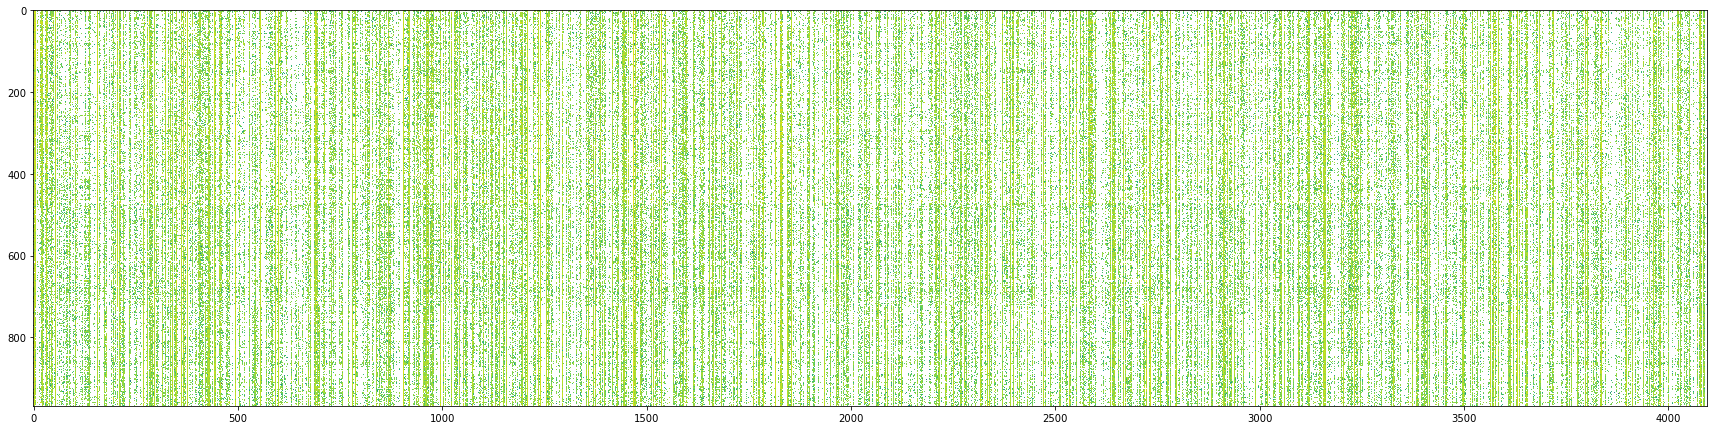

In [66]:
plt.figure(figsize=[30,30])
plt.imshow(np.log10(res2))